<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ATOM.csv')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1822,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1823,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1824,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   ATOM-USD_ADJCLOSE  1139 non-null   float64
 2   ATOM-USD_CLOSE     1139 non-null   float64
 3   ATOM-USD_HIGH      1139 non-null   float64
 4   ATOM-USD_LOW       1139 non-null   float64
 5   ATOM-USD_OPEN      1139 non-null   float64
 6   ATOM-USD_VOLUME    1139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ATOM-USD_ADJCLOSE,687
ATOM-USD_CLOSE,687
ATOM-USD_HIGH,687
ATOM-USD_LOW,687
ATOM-USD_OPEN,687
ATOM-USD_VOLUME,687


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATOM-USD_ADJCLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_CLOSE,1139.0,1.214466e+01,1.125271e+01,1.649203e+00,3.796566e+00,5.413434e+00,2.121504e+01,4.454279e+01
ATOM-USD_HIGH,1139.0,1.277825e+01,1.185602e+01,1.813534e+00,3.964141e+00,5.646225e+00,2.236199e+01,4.469553e+01
ATOM-USD_LOW,1139.0,1.146925e+01,1.060174e+01,1.130963e+00,3.652236e+00,5.195447e+00,1.963870e+01,3.922326e+01
ATOM-USD_OPEN,1139.0,1.213242e+01,1.125074e+01,1.652300e+00,3.792107e+00,5.413434e+00,2.125093e+01,4.427964e+01
ATOM-USD_VOLUME,1139.0,4.468545e+08,5.348951e+08,2.567201e+06,1.373081e+08,2.356630e+08,5.647138e+08,4.260700e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
39,2017-06-04,NaN,NaN,NaN,NaN,NaN,NaN
442,2018-07-12,NaN,NaN,NaN,NaN,NaN,NaN
828,2019-08-02,3.658143,3.658143,3.897438,3.525485,3.554553,1.068980e+08
295,2018-02-15,NaN,NaN,NaN,NaN,NaN,NaN
1579,2021-08-22,21.857561,21.857561,24.635530,21.019741,22.092634,1.123896e+09
95,2017-07-30,NaN,NaN,NaN,NaN,NaN,NaN
365,2018-04-26,NaN,NaN,NaN,NaN,NaN,NaN
517,2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN
420,2018-06-20,NaN,NaN,NaN,NaN,NaN,NaN
1488,2021-05-23,11.738483,11.738483,13.111933,8.582878,12.249307,7.068554e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
682,2019-03-09,NaN,NaN,NaN,NaN,NaN,NaN
683,2019-03-10,NaN,NaN,NaN,NaN,NaN,NaN
684,2019-03-11,NaN,NaN,NaN,NaN,NaN,NaN
685,2019-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1134,2022-04-21,23.305845,23.305845,24.913876,23.070230,24.290905,441027946.0
1135,2022-04-22,23.089931,23.089931,23.845695,22.957436,23.305815,404175037.0
1136,2022-04-23,23.271534,23.271534,23.452826,22.864717,23.089521,262237459.0
1137,2022-04-24,22.330360,22.330360,23.259838,22.315559,23.259838,296530518.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ATOM-USD_ADJCLOSE,ATOM-USD_CLOSE,ATOM-USD_HIGH,ATOM-USD_LOW,ATOM-USD_OPEN,ATOM-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0,1.331878,4.500817
1,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0,11.608961,19.942286
2,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0,1.680794,24.065681
3,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0,54.045020,55.617737
4,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0,5.520165,8.320629


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')

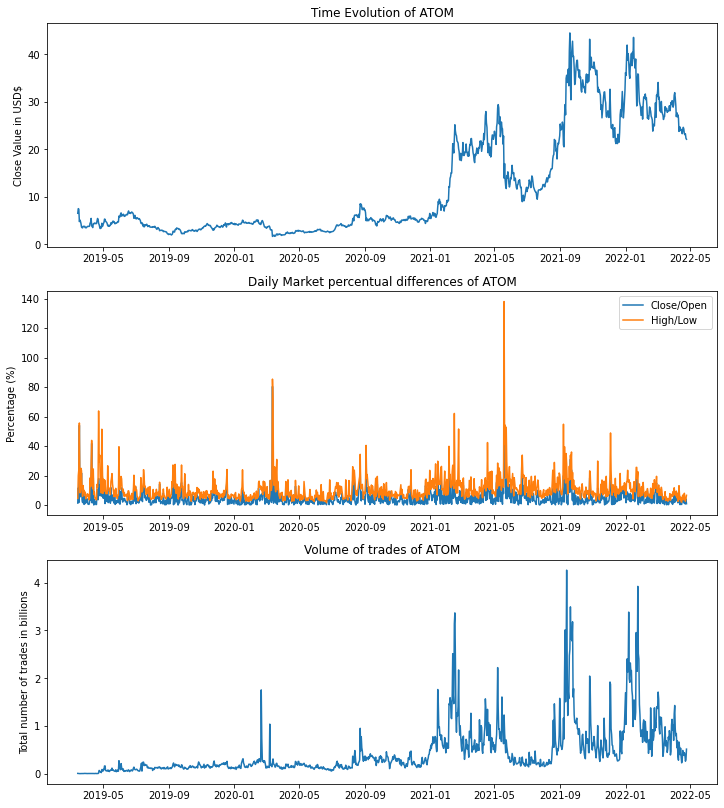

In [13]:
plot_coinValue(df)